# Сборный проект №1

**Описание проекта**

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».


**Цели проекта:**
* Провести исследовательский анализ данных
* Составить портрет пользователя каждого региона
* Проверить ряд гипотез
* Написать общий вывод

<div class="alert alert-success">
<b>Комментарий ревьюера: ✅</b>

Здорово, когда есть вступление в сам проект, каждый сможет быстрее разобраться в концепции / деталях работы. Можно также привести краткий план проведения самой работы и описание используемых столбцов. 

</div>

##  Знакомство с данными

In [2]:
#Импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib import rcParams
import seaborn as sns
import numpy as np
import warnings
from scipy import stats

warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
plt.style.use("ggplot")
rcParams['figure.figsize'] = (6,  3)

In [4]:
try:
    data = pd.read_csv('/datasets/games.csv', sep = ',')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

In [5]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


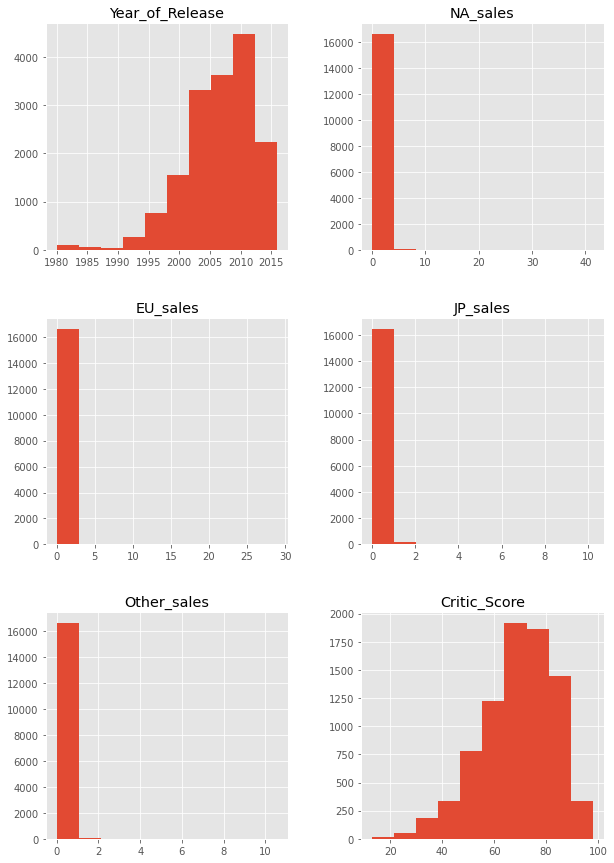

In [6]:
data.hist(figsize=(10, 15))
plt.show()

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Наблюдаем пропуски в столбцах "Name", "Year_of_Release", "Genre", "Critic_Score", "User_Score" и "Rating", с ними мы будем работать далее

## Предобработка данных

### Замена названий столбцов

In [8]:
#Приведем названия столбцов к нижнему регистру
data.columns = data.columns.str.lower()

In [9]:
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


### Преобразование данных

Видно, что столбец user_score имеет тип object, хотя является числом с плавающем токой, меняем тип на float.

In [10]:
#data['user_score'] = data['user_score'].astype(float)

При попытке изменить тип данных вышеуказанным образом выдает ошибку о невозможно конвертировать строку в число с плавающей точкой. Попробуем изучить внимательнее этот столбец

In [11]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Кроме чисел и NaN видим строку "tbd"

В кембриджском словаре нахожу такое определение аббревиатуры tbd:
    
*written abbreviation for to be decided or to be determined: used when something has not yet been decided or is not yet known:*

Иными словами:

*письменная аббревиатура для обозначения to be decided или to be determined: используется, когда что-то еще не решено или еще не известно:*

Делаю вывод о том, что данная аббревиатура тождественна по смыслу NaN, заменяю tbd на NaN

In [12]:
#Заменяю tbd на NaN
data['user_score'] = data['user_score'].replace('tbd', np.NaN)
#Привожу к типу float
data['user_score'] = data['user_score'].astype('float')

In [13]:
data['user_score'].unique()
#Все хорошо, tbd исчезло

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

### Обработка пропусков

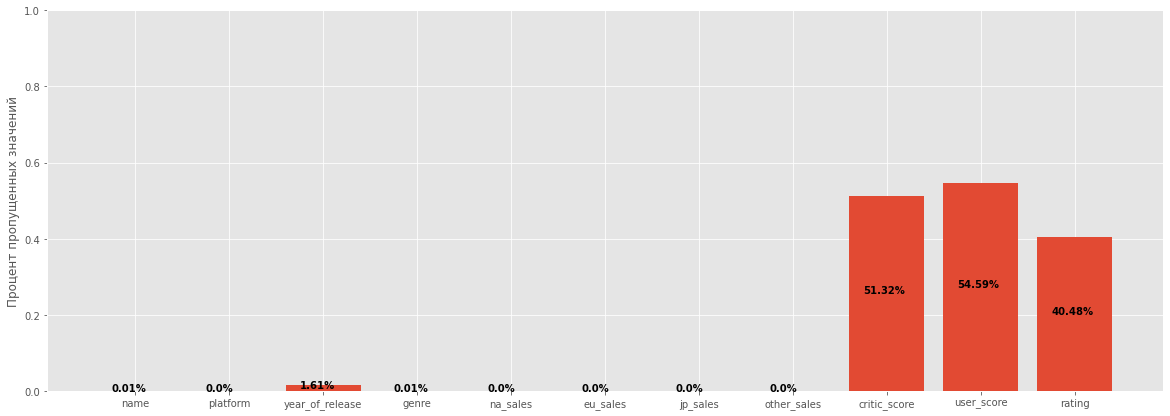

In [14]:
#Выведем процент пропущенных значения в стобцах к общему количеству значений
missing_values = data.isna().mean()

fig, ax = plt.subplots(figsize=(20,7))
ax.bar(missing_values.index, missing_values.values)
ax.set_ylabel('Процент пропущенных значений')
ax.set_ylim(0, 1)  # установить предел оси y на 0-100%

for i, v in enumerate(missing_values):
    ax.text(i-.25, v/2, str(round(v*100,2))+"%", fontweight='bold')
    
plt.show()

Наибольшее количество пропусков содержится в столбцах:
* user_score - 54.59%
* critic_score - 51.32%
* rating - 40.48%

Пропуски в таких колонках, как "user_score", "critic_score" и "rating", могут быть вызваны несколькими причинами. Некоторые возможные причины следующие:

* Ошибки сбора данных: Данные могли быть собраны неправильно, что привело к отсутствию значений в некоторых строках. Это может быть вызвано человеческим фактором или проблемами в процессе сбора данных.

* Данные недоступны: Некоторые данные могли быть недоступны на момент сбора. Например, "оценка_пользователя" могла быть недоступна для некоторых игр, которые только что вышли, или "оценка_критика" могла быть недоступна для некоторых нишевых игр, которые не были рассмотрены многими критиками.

* Данные не записаны: некоторые данные могли быть не записаны или не отслеживаться источником.

* Проблема целостности данных: Некоторые данные могли быть повреждены или потеряны во время хранения, передачи или обработки данных.


Я думала о том, чтобы заполнить значения в числовых столбцах медианным значением, применив метод группировки внутри категории жанра, но опасаюсь того, что из-за большого количества пропусков, получу сильное расхождение с истиной.

Поэтому я приняла решение не заполнять отсутсвующее значение в данных столбцах

In [16]:
data.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Однако я заменю отсутсвующие значения в других столбцах

In [17]:
data["genre"].fillna("Unknown", inplace=True)
data["rating"].fillna("Unknown", inplace=True)
data["name"].fillna("Missing", inplace=True)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           16715 non-null  object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


Добавлю столбец с суммой продаж

In [20]:
data['sales_total'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

### Вывод: 

Наибольшее количество пропусков содержится в столбцах:

user_score - 54.59%
critic_score - 51.32%
rating - 40.48%

Было принято решение не заполнять отсутсвующее значение в данных столбцах

Были заменены отсутсвующие значения в столбцах genre, rating, name


## Исследовательский анализ данных

### Периоды выпуска игр
Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

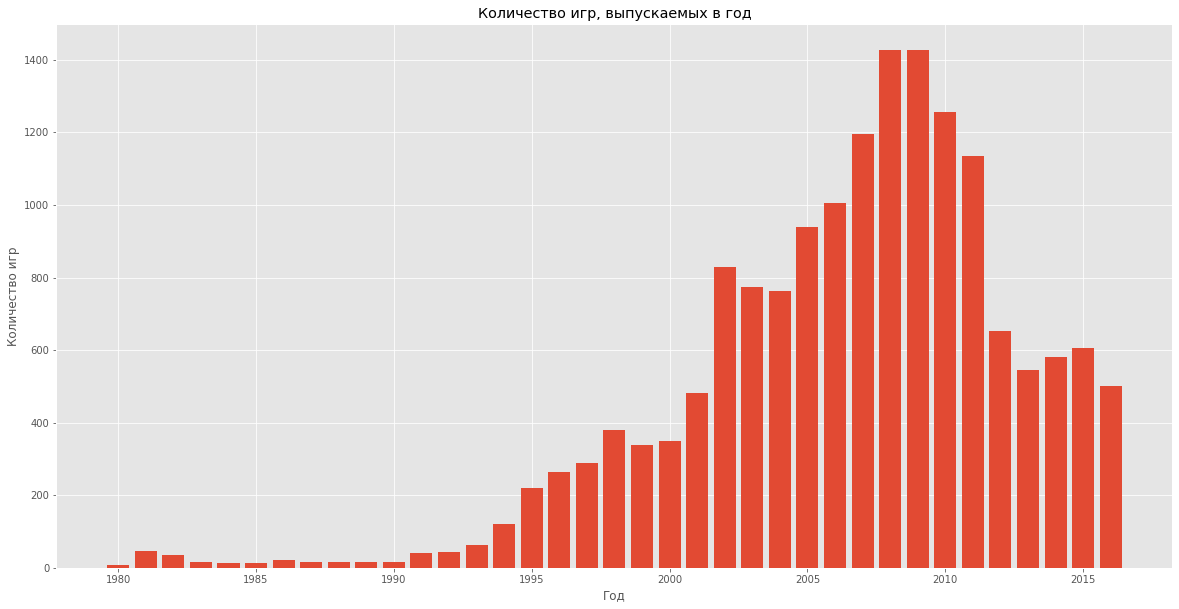

Год с наибольшим количеством выпущенных игр: 2008
Год с наименьшим количеством выпущенных игр: 1980


In [21]:
# Подсчет количества игр, выпущенных в каждом году
games_per_year = data['year_of_release'].value_counts()

# Сортировка лет в порядке возрастания
games_per_year = games_per_year.sort_index()

fig, ax = plt.subplots(figsize=(20,10))

# Создание гистограммы
plt.bar(games_per_year.index, games_per_year.values)


plt.xlabel('Год')
plt.ylabel('Количество игр')
plt.title('Количество игр, выпускаемых в год')

plt.show()

max_year = games_per_year.idxmax()
print("Год с наибольшим количеством выпущенных игр:", int(max_year))

min_year = games_per_year.idxmin()
print("Год с наименьшим количеством выпущенных игр:", int(min_year))

До 2002 года было выпущено менее 400 игр для платформ в год. На мой взгляд, период до 2002 года можно отбросить за неактуальностью

### Изменение продаж по платформам
Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

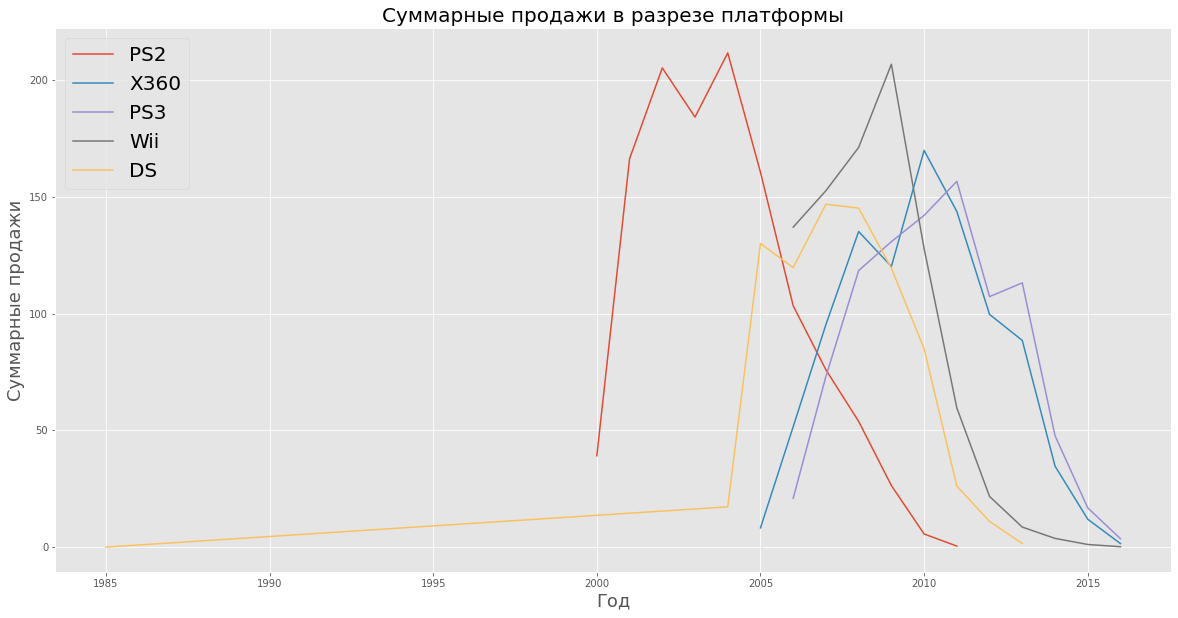

In [22]:
# Группировка данных по платформам и годам
sales_by_platform_year = data.groupby(['platform','year_of_release'])['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'sales_total'].sum()
#Получение платформ с наибольшим общим объемом продаж
top_platforms = sales_by_platform_year.groupby(['platform']).sum().nlargest(5,'sales_total')
# Изучение данных о продажах на ведущих платформах
top_platforms_data = sales_by_platform_year.loc[top_platforms.index]

fig, ax = plt.subplots(figsize=(20,10))


for platform in top_platforms.index:
    plt.plot(top_platforms_data.loc[platform].index, top_platforms_data.loc[platform]['sales_total'], label = platform)


plt.xlabel('Год',  fontsize=18)
plt.ylabel('Суммарные продажи',  fontsize=18)
plt.title('Суммарные продажи в разрезе платформы',  fontsize=20)
plt.legend(loc=2, prop={'size': 20})

plt.show()

In [23]:
print('Платформы с наибольшими суммарными продажами:')
print(top_platforms['sales_total'])

Платформы с наибольшими суммарными продажами:
platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
Name: sales_total, dtype: float64


Безоговорочным победителем стала платформа PS2. 
Далее следуют Xbox360, PS3 и Wii. К самым редким платформам относятся представители японских технологий Wii и DS.

Срок от появления до исчезновения платформы равен примерно 10 годам

### Исследуем актуальный период
* Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
* Не учитывайте в работе данные за предыдущие годы.

Подходящий период, на мой взгляд, - с 2002 по 2016 год:

Именно в эти годы вышли или вот-вот выйдут все популярные консоли;
Данный период содержит данные абсолютно по всем самым популярным консолям.
Предшествующие годы мы отбрасываем.

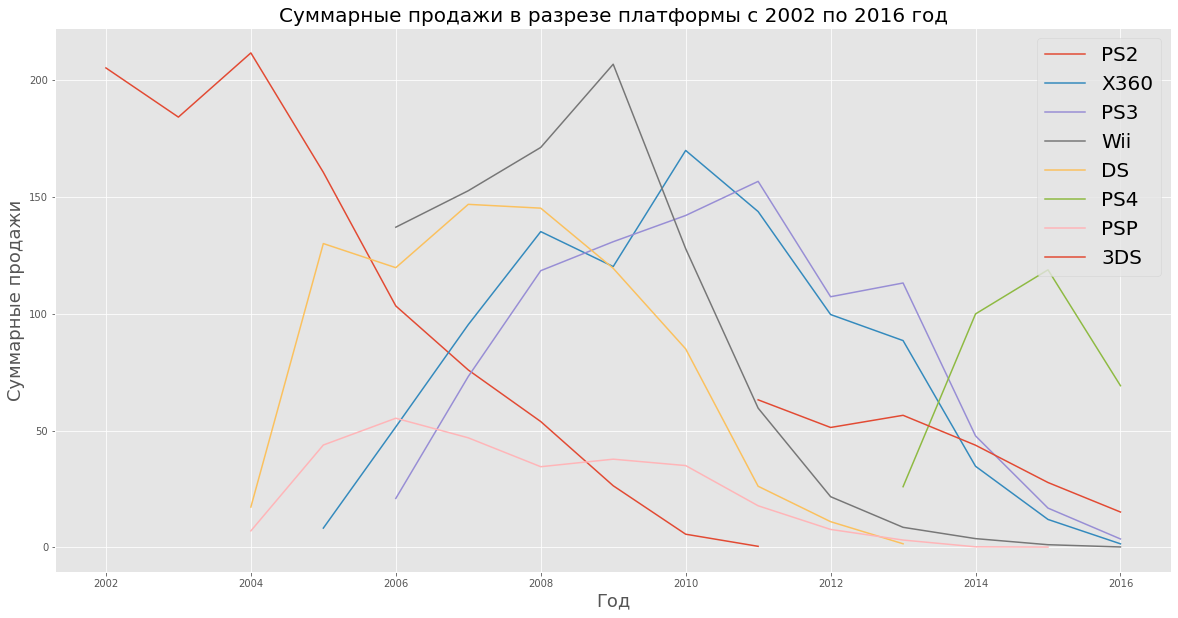

In [24]:
#Построим еще один график, показывающий тенденции продаж за уже прошедшие годы, и ответим на вопрос: 
#Какие платформы лидируют по продажам?
data_to_plot = data.query('year_of_release >= 2002')
# Группировка данных по платформам и годам
sales_by_platform_year = data_to_plot.groupby(['platform', 'year_of_release'])['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'sales_total'].sum()
#Получение платформ с наибольшим общим объемом продаж
top_platforms = sales_by_platform_year.groupby(['platform']).sum().nlargest(8,'sales_total')
# Изучение данных о продажах на ведущих платформах
top_platforms_data = sales_by_platform_year.loc[top_platforms.index]

fig, ax = plt.subplots(figsize=(20,10))



for platform in top_platforms.index:
    plt.plot(top_platforms_data.loc[platform].index, top_platforms_data.loc[platform]['sales_total'], label = platform)
    
plt.xlabel('Год',  fontsize=18)
plt.ylabel('Суммарные продажи',  fontsize=18)
plt.title('Суммарные продажи в разрезе платформы c 2002 по 2016 год',  fontsize=20)
plt.legend(loc=1, prop={'size': 20})

plt.show()

На конец 2016 года лидируют по продажам следующие платформы:

* PS4
* Xone
* PS3

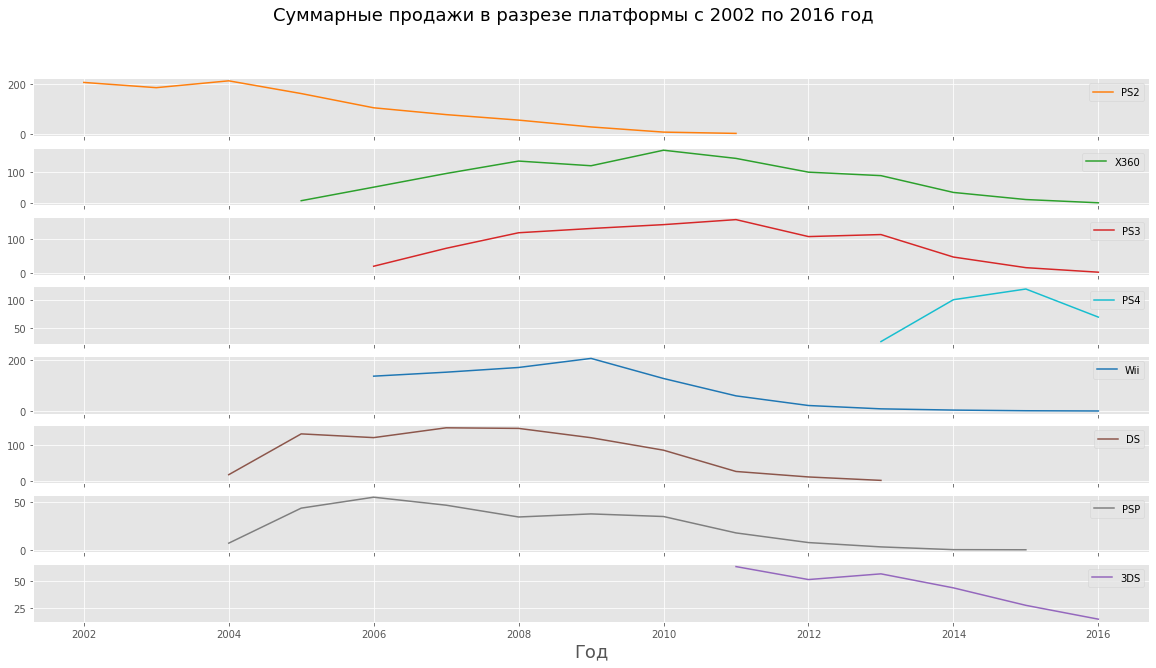

In [25]:
#Построим еще один график, показывающий тенденции продаж за уже прошедшие годы, и ответим на вопрос: 
#Какие платформы лидируют по продажам?
data_to_plot = data.query('year_of_release >= 2002')
# Группировка данных по платформам и годам
sales_by_platform_year = data_to_plot.groupby(['platform', 'year_of_release'])['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'sales_total'].sum()
#Получение платформ с наибольшим общим объемом продаж
top_platforms = sales_by_platform_year.groupby(['platform']).sum().nlargest(8,'sales_total')
# Изучение данных о продажах на ведущих платформах
top_platforms_data = sales_by_platform_year.loc[top_platforms.index]


fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8) = plt.subplots(8, sharex=True, figsize=(20,10))
fig.suptitle('Суммарные продажи в разрезе платформы c 2002 по 2016 год', fontsize=18)
ax1.plot(top_platforms_data.loc['PS2'].index, top_platforms_data.loc['PS2']['sales_total'],'tab:orange', label = 'PS2')
ax2.plot(top_platforms_data.loc['X360'].index, top_platforms_data.loc['X360']['sales_total'], 'tab:green', label = 'X360')
ax3.plot(top_platforms_data.loc['PS3'].index, top_platforms_data.loc['PS3']['sales_total'], 'tab:red', label = 'PS3')
ax4.plot(top_platforms_data.loc['PS4'].index, top_platforms_data.loc['PS4']['sales_total'], 'tab:cyan', label = 'PS4')
ax5.plot(top_platforms_data.loc['Wii'].index, top_platforms_data.loc['Wii']['sales_total'],'tab:blue', label = 'Wii')
ax6.plot(top_platforms_data.loc['DS'].index, top_platforms_data.loc['DS']['sales_total'], 'tab:brown', label = 'DS')
ax7.plot(top_platforms_data.loc['PSP'].index, top_platforms_data.loc['PSP']['sales_total'],'tab:grey', label = 'PSP')
ax8.plot(top_platforms_data.loc['3DS'].index, top_platforms_data.loc['3DS']['sales_total'], 'tab:purple', label = '3DS')

plt.xlabel('Год',  fontsize=18)


ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()
ax5.legend()
ax6.legend()
ax7.legend()
ax8.legend()


plt.show()

### Ящик с усами
Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

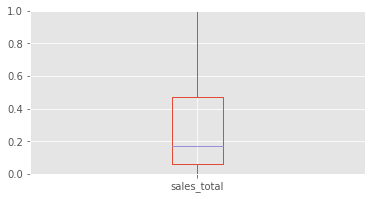

count    16715.000000
mean         0.533396
std          1.548261
min          0.000000
25%          0.060000
50%          0.170000
75%          0.470000
max         82.540000
Name: sales_total, dtype: float64

In [26]:
data.boxplot(column = 'sales_total')
plt.ylim(0, 1)
plt.show()


data['sales_total'].describe()

Продажи игр, в среднем составляют до 0,6 млн долларов. Медиана - 0,17 миллиона долларов. Не сказать, что это много. Максимальное значение 82,5 млн долларов

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Попробуй отобразить платформы по общим продажам, сразу на одном графике.
    
</div>

### Пользователи vs Критики
Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

In [27]:
data_ps2 = data.query('platform == "PS2"')

In [28]:
data_ps2.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
17,Grand Theft Auto: San Andreas,PS2,2004.0,Action,9.43,0.40,0.41,10.57,95.0,9.0,M,20.81
24,Grand Theft Auto: Vice City,PS2,2002.0,Action,8.41,5.49,0.47,1.78,95.0,8.7,M,16.15
28,Gran Turismo 3: A-Spec,PS2,2001.0,Racing,6.85,5.09,1.87,1.16,95.0,8.4,E,14.97
38,Grand Theft Auto III,PS2,2001.0,Action,6.99,4.51,0.30,1.30,97.0,8.5,M,13.10
48,Gran Turismo 4,PS2,2004.0,Racing,3.01,0.01,1.10,7.53,89.0,8.5,E,11.65


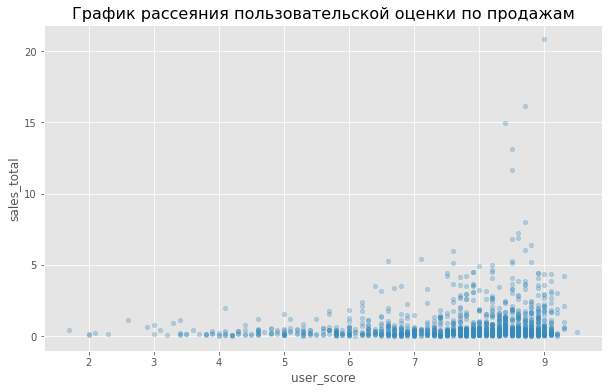

In [29]:
data_ps2.plot(x = 'user_score', y = 'sales_total', kind = 'scatter', alpha = 0.3, figsize=(10,6))
plt.title('График рассеяния пользовательской оценки по продажам',  fontsize=16)
plt.show()

In [30]:
print('Корреляция пользовательской оценки и продаж:','\n')
print(data_ps2['user_score'].corr(data_ps2['sales_total']))

Корреляция пользовательской оценки и продаж: 

0.17286551112058227


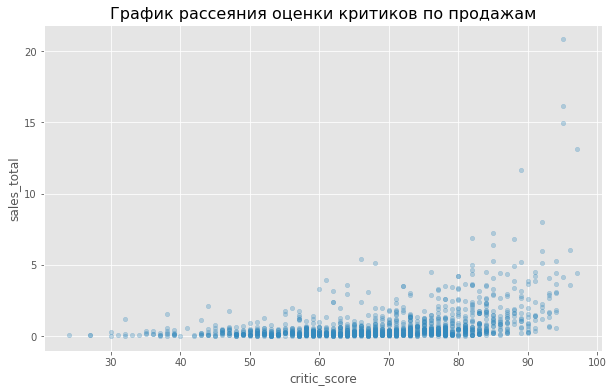

In [31]:
data_ps2.plot(x = 'critic_score', y = 'sales_total', kind = 'scatter', alpha = 0.3, figsize=(10,6))
plt.title('График рассеяния оценки критиков по продажам',  fontsize=16)
plt.show()

In [32]:
print('Корреляция оценки критиков и продаж:','\n')
print(data_ps2['critic_score'].corr(data_ps2['sales_total']))

Корреляция оценки критиков и продаж: 

0.39543454945454876


<AxesSubplot:>

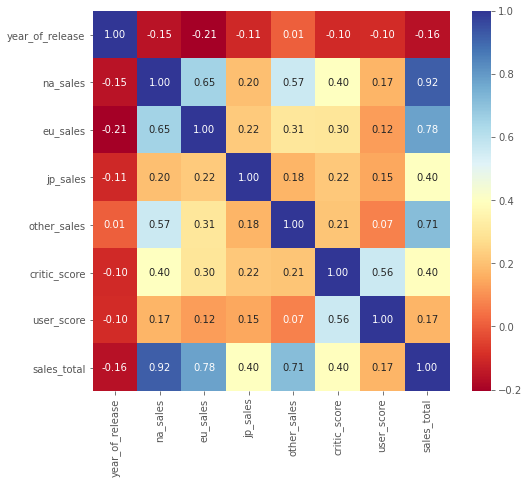

In [33]:
plt.figure(figsize=(8,7))
sns.heatmap(data_ps2.corr(), annot=True, cmap="RdYlBu", fmt='.2f', annot_kws={'size':10})

Коэффициент корреляции между оценкой критиков и объемом продаж выше, чем между оценкой пользователя и объемом продаж для PS2

* Соотнесите выводы с продажами игр на других платформах.

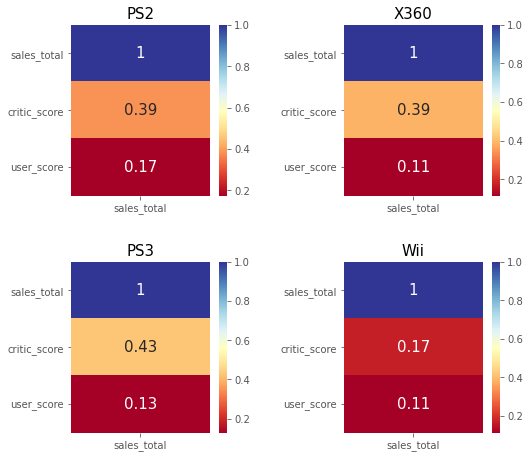

In [34]:
top_platf = ['PS2', 'X360', 'PS3', 'Wii']

fig, axes = plt.subplots(2, 2, figsize=(8, 7))
rows = 2
cols = 2
count = 0

for i1 in range(rows):
    for i2 in range(cols):
        curr_platf = top_platf[count]
        data_prep = data[(data['platform'] == curr_platf) & (data['user_score'] > 0)].copy()
        data_filt = data_prep[['sales_total' ,'critic_score', 'user_score']]
        ax = sns.heatmap(data_filt.corr()[['sales_total']].sort_values(by='sales_total', ascending=False), 
                         cmap="RdYlBu",  annot_kws={'size':15}, ax=axes[i1,i2], annot=True,)
        ax.set_title(curr_platf, fontsize=15)
        ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
        plt.tight_layout(pad=3)
        count += 1
      

С другими платформами наблюдается аналогичная ситуация, user score практически не влияет (или мало влияет) на общую выручку

### Прибыльные жанры
Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [35]:
top_genre = data.groupby(['genre']).sum().nlargest(8,'sales_total')
print(top_genre['sales_total'])

genre
Action          1744.17
Sports          1331.27
Shooter         1052.45
Role-Playing     934.56
Platform         827.77
Misc             802.51
Racing           728.67
Fighting         447.53
Name: sales_total, dtype: float64


Три самых прибыльных жанра это:
* Action - 1744 млрд
* Sports - 1331 млрд
* Shooter - 1052 млрд

In [48]:
all_pivot = data.groupby('genre').agg({'name': 'count', 'sales_total': 'sum'}).sort_values(by='sales_total', ascending=False)
all_pivot2 = data.groupby('genre').agg({'name': 'count', 'sales_total': 'mean'}).sort_values(by='sales_total', ascending=False)
print(all_pivot)
print(all_pivot2)

              name  sales_total
genre                          
Action        3369      1744.17
Sports        2348      1331.27
Shooter       1323      1052.45
Role-Playing  1498       934.56
Platform       888       827.77
Misc          1750       802.51
Racing        1249       728.67
Fighting       849       447.53
Simulation     873       389.97
Puzzle         580       242.57
Adventure     1303       237.59
Strategy       683       174.23
Unknown          2         2.42
              name  sales_total
genre                          
Unknown          2     1.210000
Platform       888     0.932173
Shooter       1323     0.795503
Role-Playing  1498     0.623872
Racing        1249     0.583403
Sports        2348     0.566980
Fighting       849     0.527126
Action        3369     0.517711
Misc          1750     0.458577
Simulation     873     0.446701
Puzzle         580     0.418224
Strategy       683     0.255095
Adventure     1303     0.182341


В аутсайдерах пазлы, стратегии и неизвестные жанры

### Вывод: 
* До 2002 года было выпущено менее 400 игр для платформ в год. На мой взгляд, период до 2002 года можно отбросить за неактуальностью. Больше всего игр было выпущено в 2008 году, меньше всего в 1980 г.
* Безоговорочным победителем стала платформа PS2. Далее следуют Xbox360, PS3 и Wii. К самым редким платформам относятся представители японских технологий Wii и DS.Срок от появления до исчезновения платформы равен примерно 10 годам
* Подходящий период, на мой взгляд, - с 2002 по 2016 год: Именно в эти годы вышли или вот-вот выйдут все популярные консоли; Данный период содержит данные абсолютно по всем самым популярным консолям. Предшествующие годы мы отбрасываем.
* Продажи игр, в среднем составляют до 0,6 млн долларов. Медиана - 0,17 миллиона долларов. Не сказать, что это много. Максимальное значение 82,5 млн долларов
* Коэффициент корреляции между оценкой критиков и объемом продаж выше, чем между оценкой пользователя и объемом продаж для PS2
* Три самых прибыльных жанра это: Action - 1744 млрд, Sports - 1331 млрд, Shooter - 1052 млрд. В аутсайдерах пазлы, стратегии и неизвестные жанры
* По среднему значению продаж мы можем сделать вывод о том, что самую большую выручку, в среднем, приносят жанры Platform и Shooter, а также Role-Playing


## Пользовательский портрет

Определите для пользователя каждого региона (NA, EU, JP):

### Самые популярные платформы (топ-5). Опишите различия в долях продаж.

In [37]:
sales_pivot_1 = data.pivot_table(values=['na_sales', 'eu_sales', 'jp_sales'], index='platform', aggfunc='sum')

# Получаем топ-5 платформ 
top_pl_NA = sales_pivot_1.sort_values(by='na_sales', ascending=False).head(5)
top_pl_EU = sales_pivot_1.sort_values(by='eu_sales', ascending=False).head(5)
top_pl_JP = sales_pivot_1.sort_values(by='jp_sales', ascending=False).head(5)

# Выводим таблицу
print("Топ-5 платформ для Северной Америки:")
print(top_pl_NA['na_sales'])
print("\nТоп-5 платформ для Европы:")
print(top_pl_EU['eu_sales'])
print("\nТоп-5 платформ для Японии:")
print(top_pl_JP['jp_sales'])

Топ-5 платформ для Северной Америки:
platform
X360    602.47
PS2     583.84
Wii     496.90
PS3     393.49
DS      382.40
Name: na_sales, dtype: float64

Топ-5 платформ для Европы:
platform
PS2     339.29
PS3     330.29
X360    270.76
Wii     262.21
PS      213.61
Name: eu_sales, dtype: float64

Топ-5 платформ для Японии:
platform
DS      175.57
PS      139.82
PS2     139.20
SNES    116.55
3DS     100.67
Name: jp_sales, dtype: float64


В Северной Америке лидирует: 
X360 и  Wii, тогда как в Европе больше популярны: 
PS3 и PS2. В Японии лидирует: DS и PS2

### Самые популярные жанры (топ-5). Поясните разницу.

In [38]:
sales_pivot_2 = data.pivot_table(values=['na_sales', 'eu_sales', 'jp_sales'], index='genre', aggfunc='sum')

# Получаем топ-5 жанров
top_genres_NA = sales_pivot_2.sort_values(by='na_sales', ascending=False).head(5)
top_genres_EU = sales_pivot_2.sort_values(by='eu_sales', ascending=False).head(5)
top_genres_JP = sales_pivot_2.sort_values(by='jp_sales', ascending=False).head(5)

# Печатаем таблицу
print("Топ-5 жанров для Северной Америки:")
print(top_genres_NA['na_sales'])
print("\nТоп-5 жанров для Европы:")
print(top_genres_EU['eu_sales'])
print("\nТоп-5 жанров для Японии:")
print(top_genres_JP['jp_sales'])

Топ-5 жанров для Северной Америки:
genre
Action      879.01
Sports      684.43
Shooter     592.24
Platform    445.50
Misc        407.27
Name: na_sales, dtype: float64

Топ-5 жанров для Европы:
genre
Action     519.13
Sports     376.79
Shooter    317.34
Racing     236.51
Misc       212.74
Name: eu_sales, dtype: float64

Топ-5 жанров для Японии:
genre
Role-Playing    355.41
Action          161.43
Sports          135.54
Platform        130.83
Misc            108.11
Name: jp_sales, dtype: float64


В Северной Америке и Европе предпочтения примерно одинаковы: и те, и другие являются поклонниками экшн-игр, спортивных игр и шутеров. При этом в Северной Америке больше играют в платформеры, в то время как в Европе часто выбирают гонки.


Что касается Японии, то здесь вкусы кардинально отличаются - на первом месте ролевые игры, причем с большим отрывом. Следом идут экшн и спортивные игры.

### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Чтобы определить, влияет ли рейтинг ESRB на продажи в отдельном регионе, можно использовать box plot для визуализации распределения продаж для каждого рейтинга в каждом регионе.

Распределение продаж для каждого рейтинга в Северной Америке:

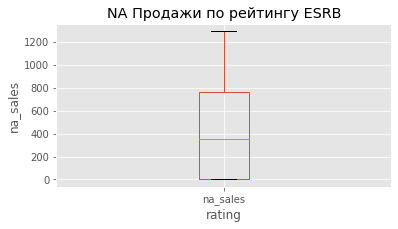

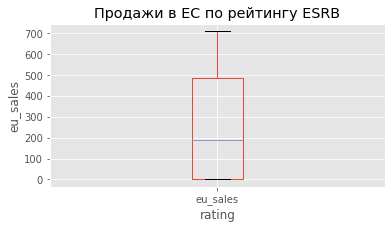

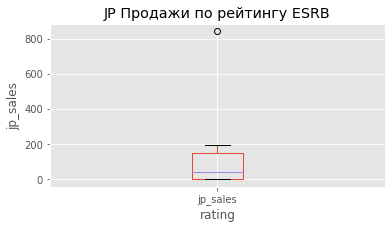

In [39]:
sales_by_rating_na = data.groupby('rating')['na_sales'].sum()
sales_by_rating_na.plot(kind='box')
plt.xlabel('rating')
plt.ylabel('na_sales')
plt.title('NA Продажи по рейтингу ESRB')
plt.show()

sales_by_rating_eu = data.groupby('rating')['eu_sales'].sum()
sales_by_rating_eu.plot(kind='box')
plt.xlabel('rating')
plt.ylabel('eu_sales')
plt.title('Продажи в ЕС по рейтингу ESRB')
plt.show()

sales_by_rating_jp = data.groupby('rating')['jp_sales'].sum()
sales_by_rating_jp.plot(kind='box')
plt.xlabel('rating')
plt.ylabel('jp_sales')
plt.title('JP Продажи по рейтингу ESRB')
plt.show()

Если мы видим, что графики для определенного рейтинга имеют более высокую медиану и/или больший интерквартильный размах, чем графики для других регионов, это говорит о том, что рейтинг ESRB влияет на продажи в этом регионе.

Заметно, что для Европейского региона и для региона Северной Америки характерен более значительный интерквартильный размах, что может говорить о связи между рейтингом ESRB и объемом продаж.

Самая большая медиана по продажам в регионе Северная Америка

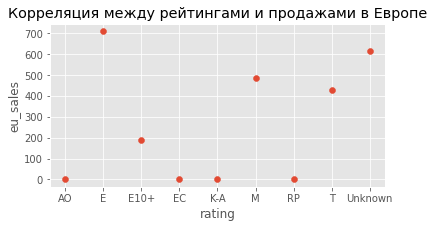

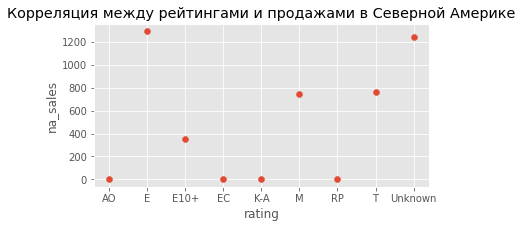

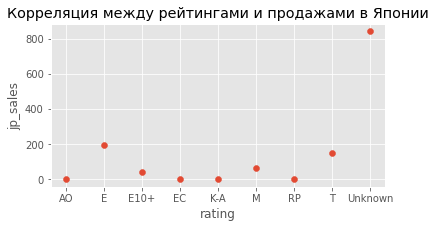

In [40]:

# Строим scatter plot
plt.scatter(sales_by_rating_eu.index, sales_by_rating_eu.values)
plt.xlabel('rating')
plt.ylabel('eu_sales')
plt.title('Корреляция между рейтингами и продажами в Европе')
plt.show()

# Строим scatter plot
plt.scatter(sales_by_rating_na.index, sales_by_rating_na.values)
plt.xlabel('rating')
plt.ylabel('na_sales')
plt.title('Корреляция между рейтингами и продажами в Северной Америке')
plt.show()

# Строим scatter plot
plt.scatter(sales_by_rating_jp.index, sales_by_rating_jp.values)
plt.xlabel('rating')
plt.ylabel('jp_sales')
plt.title('Корреляция между рейтингами и продажами в Японии')
plt.show()

### Вывод:

* Заметно, что для Европейского региона и для региона Северной Америки характерен более значительный интерквартильный размах, что может говорить о связи между рейтингом ESRB и объемом продаж.
* Самая большая медиана по продажам в регионе Северная Америка
* В Северной Америке и в Европе влияние рейтинга на продажи схожее. Большая часть выручки получена с игр с рейтингом E, то есть "Для всех", также там хорошо продаются такие жанры, как M, то есть > 17 лет
* В Японии наиболее популярный жанр, также E, то есть "Для всех", на втором месте жанр T для лиц 13-19 лет

## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Чтобы проверить гипотезу о том, что средние оценки пользователей платформ Xbox One и PC одинаковы, можно использовать t-тест. t-тест - это статистический метод, который сравнивает средние значения двух выборок, чтобы определить, отличаются ли они.

В данном случае:
Н0 - Заключается в том, что **средние оценки пользователей платформ Xbox One и ПК одинаковы.** 

Н1 - средние пользовательские рейтинги платформ Xbox One и PC отличаются между собой.

Чтобы проверить гипотезу, можно сравнить p-значение с уровнем значимости (альфа), зададим alpha = 0.05

In [41]:
data['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [42]:
# Получаем пользовательские рейтинги для платформ Xbox One и PC
xbox_ratings = data[(data['platform'] == 'XOne') & (data['user_score'] > 0)]['user_score']
pc_ratings =  data[(data['platform'] == 'PC') & (data['user_score'] > 0)]['user_score']

# Проводим t-тест
t_stat, p_value = stats.ttest_ind(xbox_ratings, pc_ratings)

print('t = {}\np-value = {:.10e}'.format(t_stat, p_value))
print('\nПороговое значение alpha = 0.05')

t = -4.368333815003015
p-value = 1.3896435534e-05

Пороговое значение alpha = 0.05


P-значение меньше 0.05, это означает, что разница в средних статистически значима, и можно отвергнуть нулевую гипотезу. Это говорит о том, что средние оценки пользователей платформ Xbox One и PC не одинаковы.

### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

В данном случае: H0 - Заключается в том, что **Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые**

Н1  - средние пользовательские рейтинги жанров Action и Sports отличаются между собой.

In [43]:
action_ratings = data[(data['genre'] == 'Action')& (data['user_score'] > 0)]['user_score']
sports_ratings = data[(data['genre'] == 'Sports')& (data['user_score'] > 0)]['user_score']

# Проводим t-тест
t_stat, p_value = stats.ttest_ind(action_ratings, sports_ratings)

print('t = {}\np-value = {:.10e}'.format(t_stat, p_value))
print('\nПороговое значение alpha = 0.05')

t = 1.6259419280500857
p-value = 1.0406951359e-01

Пороговое значение alpha = 0.05


Если p-значение больше уровня значимости, это означает, что разница в средних не является статистически значимой, что говорит о том, что нет достаточных доказательств того, что средние пользовательские оценки жанров Action и Sports отличаются

Так что мы не можем отвергнуть нулевую гипотезу

Важно отметить, что для того, чтобы t-тест был достоверным, необходимо соблюсти множество допущений. Предполагается, что данные нормально распределены и что разброс двух выборок одинаков. Если эти предположения не выполняются, можно использовать альтернативные статистические тесты, такие как t-тест Уэлча или U-тест Манна-Уитни.

### Вывод:
* Для первой гипотезы: P-значение меньше 0.05, это означает, что разница в средних статистически значима, и можно отвергнуть нулевую гипотезу. Это говорит о том, что средние оценки пользователей платформ Xbox One и PC не одинаковы.
* Для второй гипотезы: Если p-значение больше уровня значимости, это означает, что разница в средних не является статистически значимой, что говорит о том, что нет достаточных доказательств того, что средние пользовательские оценки жанров Action и Sports отличаются, так что мы не можем отвергнуть нулевую гипотезу


## Вывод

* **По результатам анализа:** сильнейшее влияние на конечный доход в большинстве случаев оказывают оценки критиков. Пользовательские оценки не оказывают такого "влияния" на выручку. Следует поработать в этом направлении.


* До 2002 года выходило менее 400 игр для платформ в год. На мой взгляд, период до 2002 года можно отбросить за неактуальностью. Больше всего игр было выпущено в 2008 году, меньше всего - в 1980 году. Это может быть связано с резким скачком в развитии технологий и популяризации приставок и консолей, а угасающий тренд может быть связан с популяризацией мобильных игр и приложений, а также с увеличением мощностей ПК


* Безоговорочным победителем среди игровых платформ прошлого стала платформа PS2. Далее следуют Xbox360, PS3 и Wii. Среди самых редких платформ - японская технология Wii и DS.Период от появления до исчезновения платформы составляет около 10 лет.


* Продажи игр, в среднем, достигают 0,6 млн. Медиана составляет 0,17 млн. Максимальное значение - 82,5 миллиона долларов.


* Тремя самыми прибыльными жанрами являются: Action - 1744 млрд, Sports - 1331 млрд, Shooter - 1052 млрд. В число аутсайдеров входят головоломки, стратегии и неизвестные жанры, если выбирать жанр для новой игры стоит остановиться на первых трех, чтобы максимизировать прибыль


* В Северной Америке и в Европе влияние рейтинга на продажи схожее. Большая часть выручки получена с игр с рейтингом E, то есть "Для всех", также там хорошо продаются такие жанры, как M, то есть > 17 летВ Японии наиболее популярный жанр, также E, то есть "Для всех", на втором месте жанр T для лиц 13-19 лет. На это стоит ориентироваться при выходе на международный рынок.


* Средние оценки пользователей платформ Xbox One и PC не одинаковы, а вот средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») нельзя назвать сильно различающимися